# Descrição do Problema

A pandemia de COVID-19 é um evento histórico sem precedentes que afetou a saúde e a vida de milhões de pessoas em todo o mundo. Desde o seu surgimento em dezembro de 2019 (HUANG C.; WANG, 2020), o novo coronavírus se espalhou rapidamente pelo globo, levando a medidas de contenção sem precedentes, como o distanciamento social, o fechamento de fronteiras e a interrupção de atividades econômicas. O impacto da COVID-19 foi sentido em todas as esferas da sociedade, desde a saúde pública até a economia, a educação e as relações sociais.

A pandemia de COVID-19 chegou ao Brasil em fevereiro de 2020, quando o país
registrou seu primeiro caso confirmado da doença. Desde então, a COVID-19 se espalhou rapidamente por todo o território nacional, levando o país a se tornar um dos epicentros mundiais da pandemia.

Em março de 2020, o governo federal decretou estado de emergência em saúde pública de importância nacional em razão da pandemia de COVID-19. Desde então, várias medidas foram tomadas em todo o país para conter a disseminação do vírus, como a imposição de medidas de distanciamento social, o fechamento de escolas e comércios não essenciais, a restrição de viagens e a proibição de aglomerações.

No entanto, a implementação dessas medidas foi desigual em todo o país, com alguns estados e municípios adotando estratégias mais rigorosas e outros sendo mais lenientes. Além disso, o país enfrentou uma série de desafios na gestão da pandemia, como a escassez de equipamentos de proteção individual para profissionais de saúde, a falta de testes em massa e a falta de coordenação entre os governos federal, estaduais e municipais.

Neste trabalho iremos utilizar dados públicos, obtidos no Open Data SUS, sobre Síndrome Respiratória Aguda Grave e COVID para criar modelos de classificação que nos permitam estimar quais pacientes tem mais chance de vir a óbito com base em diversas características coletadas.

Para isso, consideramos apenas os casos de pacientes adultos, isto é, com 18 anos ou mais, hospitalizados por Covid-19 e que foram notificados no ano de 2022.

O questionário que monitora a Síndrome Respiratória Aguda Grave já existia antes da COVID, mas foi alterado em virtude desta. Essa mudança nos obriga a tomar um cuidado adicional na limpeza dos dados.

Os modelos serão criados usandos técnicas de aprendizado supervisionado com o objetivo de predizer o desfecho de um paciente internado com COVID-19. Com o objetivo de avaliar a capacidade preditiva dos modelos usaremos métricas de avaliações que envolvam sensibilidade e especificidade, como a acurácia, f1 score e área sob a curva ROC, entre outras que forem julgadas pertinentes.

Além do modelo preditivo em si, haverá um ganho de informação se conseguirmos
extrair do modelo as informações referentes à importância das variáveis, a fim de identificar os fatores que mais influenciam no desfecho dos pacientes. Trabalhos semelhantes estão se tornando mais comuns (DABBAGH, 2023) (SILVADARCY RISOMARIO; NETO, 2022) e um entendimento dos modelos aumentará a usabilidade dos mesmos nas mais diversas áreas, trazendo benefícios e aumentando a responsabilidade de seus usos.



Usaremos os dados obtidos no [Open Data SUS](https://opendatasus.saude.gov.br/dataset/srag-2021-a-2023) sobre casos de Síndrome Respiratória Aguda Grave Hospitalizados para o ano de 2022. Para acessar o dicionário de dados, clique [aqui](https://opendatasus.saude.gov.br/dataset/srag-2021-a-2023/resource/3135ac9c-2019-4989-a893-2ed50ebd8e68?inner_span=True).

# Análise de Dados Exploratória

In [1]:
!pip install watermark -q

In [2]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import chi2, chi2_contingency
import warnings
import watermark
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (5,2)

In [3]:
%load_ext watermark
%watermark --iversions --python

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

seaborn   : 0.12.2
scipy     : 1.10.1
numpy     : 1.23.5
matplotlib: 3.7.1
watermark : 2.4.3
pandas    : 1.5.3



In [4]:
# importando os dados
path = 'https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SRAG/2022/INFLUD22-06-03-2023.csv'
dados = pd.read_csv(path, sep=';')
dados.head()

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,...,LOTE_2_COV,LOTE_REF,FNT_IN_COV,DOSE_2REF,FAB_COVRF2,LOTE_REF2,TRAT_COV,TIPO_TRAT,OUT_TRAT,DT_TRT_COV
0,05/01/2022,1,02/01/2022,1,RJ,NaN,NaN,RIO DE JANEIRO,330455,SMS UPA 24H MAGALHAES BASTOS AP 51,...,210017,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,07/01/2022,1,06/01/2022,1,SP,GVE XXVII SAO JOSE DOS CAMPOS,1351.0,SAO JOSE DOS CAMPOS,354990,HOSPITAL VIVALLE,...,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,04/01/2022,1,03/01/2022,1,MS,NRS DE DOURADOS,1966.0,DOURADOS,500370,HOSPITAL EVANGELICO DR SRA GOLDSBY KING,...,FF8844,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,07/01/2022,1,04/01/2022,1,GO,PIRINEUS,1792.0,ANAPOLIS,520110,HOSPITAL EVANGELICO GOIANO SA,...,210120,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,07/01/2022,1,04/01/2022,1,GO,SAO PATRICIO,1791.0,RUBIATABA,521890,HOSPITAL MUNICIPAL DE RUBIATABA,...,202010031,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Verificando a dimensão do dataset

In [5]:
print(f'O dataset contém {dados.shape[0]} linhas e {dados.shape[1]} colunas')

O dataset contém 556445 linhas e 173 colunas


### Selecionando apenas observações para o ano de 2022

In [6]:
dados['DT_NOTIFIC'] = pd.to_datetime(dados['DT_NOTIFIC'])
dados['ano'] = dados['DT_NOTIFIC'].dt.strftime('%Y')

In [7]:
dados.shape

(556445, 174)

In [8]:
dados = dados[dados['ano'] == '2022']
dados.shape

(550376, 174)

### Selecionando Colunas de Interesse

Nosso dataset contém muitas colunas que não são do nosso interesse e, portanto, vamos manter apenas as colunas do nosso interesse e descartar as demais.

In [9]:
manter_colunas = ['CS_SEXO','NU_IDADE_N','TP_IDADE','CS_RACA','CS_ESCOL_N',
                  'CS_ZONA','NOSOCOMIAL','FEBRE','TOSSE','GARGANTA',
                  'DISPNEIA','DESC_RESP','SATURACAO','DIARREIA','VOMITO',
                  'OUTRO_SIN','PUERPERA','CARDIOPATI','HEMATOLOGI',
                  'SIND_DOWN','HEPATICA','ASMA','DIABETES','NEUROLOGIC',
                  'PNEUMOPATI','IMUNODEPRE','RENAL','OBESIDADE','OUT_MORBI',
                  'HOSPITAL','SG_UF_INTE','UTI','SUPORT_VEN','CLASSI_FIN',
                  'EVOLUCAO','DOR_ABD','FADIGA','PERD_OLFT','PERD_PALA','VACINA_COV']

dados = dados[manter_colunas]

In [10]:
# verificando as dimensões do dataframe
print(f'O dataset contém {dados.shape[0]} linhas e {dados.shape[1]} colunas')

O dataset contém 550376 linhas e 40 colunas


### Variável `HOSPITAL`

Vamos analisar apenas pacientes que foram internados, por isso vamos selecionar apenas as observações `HOSPITAL == 1`. Após isso vamos descartar a coluna `HOSPITAL` pois todas as observações vão ser iguais a `1` e a coluna não vai trazer mais nenhuma informação relevante.

In [11]:
# vamos analisar apenas pacientes que foram internados (HOSPITAL == 1)
dados = dados[dados['HOSPITAL'] == 1]

# deletando a coluna HOSPITAL
dados.drop(columns=['HOSPITAL'], axis=1, inplace=True)

# verificando as dimensões do dataframe
print(f'O dataset contém {dados.shape[0]} linhas e {dados.shape[1]} colunas')

O dataset contém 520044 linhas e 39 colunas


### Variáveis `TP_IDADE` e `NU_IDADE_N`

Vamos trabalhar apenas com adultos, para isto vamos selecionar `TP_IDADE == 3` (que indica tempo em anos) e após isso `NU_IDADE_N >= 18`.

In [12]:
# selecionando apenas idade em anos
dados = dados[dados['TP_IDADE'] == 3]

# deletando a coluna TP_IDADE
dados.drop(columns=['TP_IDADE'], axis=1, inplace=True)

In [13]:
# selecionando apenas pessoas com idade >= 18
dados = dados[dados['NU_IDADE_N'] >= 18]

In [14]:
print(f'O dataset contém {dados.shape[0]} linhas e {dados.shape[1]} colunas')

O dataset contém 360938 linhas e 38 colunas


### Variável `CLASSI_FIN`

Vamos trabalhar só com pacientes de COVID-19, portanto iremos usar `CLASSI_FIN == 5`. Após isso vamos descartar essa coluna.

In [15]:
# selecionando apenas pessoas com COVID-19
dados = dados[dados['CLASSI_FIN'] == 5]

# deletando a coluna TP_IDADE
dados.drop(columns=['CLASSI_FIN'], axis=1, inplace=True)

In [16]:
print(f'O dataset contém {dados.shape[0]} linhas e {dados.shape[1]} colunas')

O dataset contém 203442 linhas e 37 colunas


### Dados Faltantes e `9 - Ignorado`

Iremos substituir dados faltantes e as observações não registradas (`9 - Ignorado`) para todas as variáveis de fatores associados (puérpera, doença cardiovascular crônica, doença hematológica crônica, síndrome de Down, doença hepática crônica, asma, diabetes mellitus, doença neurológica crônica, outra pneumopatia crônica, imodeficiência ou imunosupressão, doença renal crônica, obesidade ou outros fatores) pelo valor `0`.

Também vamos trocar `2` que significa `Não` para `0`.

In [17]:
var = ['PUERPERA','CARDIOPATI','HEMATOLOGI','SIND_DOWN','HEPATICA',
       'ASMA','DIABETES','NEUROLOGIC','PNEUMOPATI','IMUNODEPRE',
       'RENAL','OBESIDADE','OUT_MORBI','FEBRE','TOSSE','GARGANTA',
       'DISPNEIA','DESC_RESP','SATURACAO','DIARREIA','VOMITO','UTI',
       'OUTRO_SIN','DOR_ABD','FADIGA','PERD_OLFT','PERD_PALA',
       'NOSOCOMIAL','SUPORT_VEN']

dados[var] = dados[var].replace({9:0,np.nan:0,2:0})

Não temos como imputar um valor para as variáveis `CS_ESCOL_N` (escolaridade), `CS_RACA` (raça), `CS_ZONA` (zona urbana/rural) e `VACINA_COV` (se a pessoa se vacinou para a COVID-19) então vamos trocar `9 - Ignorado` por `np.nan`.

In [18]:
dados['CS_ESCOL_N'] = dados['CS_ESCOL_N'].replace({9:np.nan,2:0})
dados['CS_ZONA'] = dados['CS_ZONA'].replace({9:np.nan,2:0})
dados['CS_RACA'] = dados['CS_RACA'].replace({9:np.nan,2:0})
dados['VACINA_COV'] = dados['VACINA_COV'].replace({9:np.nan,2:0})

### Variável `EVOLUCAO`

Nossa variável alvo é a `EVOLUCAO` e nos interessa saber se o paciente se curou (`1 - Cura`) ou veio a óbito, assim vamos excluir o caso `Ignorado`.

In [19]:
dados = dados[dados['EVOLUCAO'] != 9]

In [20]:
print(f'O dataset contém {dados.shape[0]} linhas e {dados.shape[1]} colunas')

O dataset contém 199453 linhas e 37 colunas


A variável `EVOLUCAO` tem três categorias (`1-Cura`, `2-Óbito`, `3-Óbito por outras causas`). Vamos mudar 1 para 0 e juntar as observações `2-Óbito` e `3-Óbito por outras causas` em 1.

In [21]:
dados['EVOLUCAO'] = dados['EVOLUCAO'].replace({1:0, 2:1, 3:1})

In [22]:
dados['EVOLUCAO'].value_counts()

0.0    129682
1.0     59662
Name: EVOLUCAO, dtype: int64

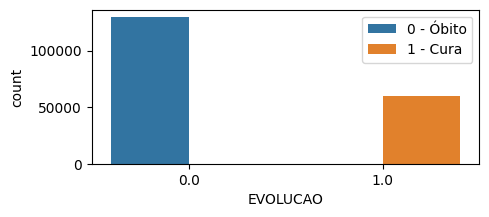

In [23]:
sns.countplot(data=dados, x='EVOLUCAO', hue='EVOLUCAO')
plt.legend(labels = ['0 - Óbito', '1 - Cura']);

### Variável `SUPORT_VEN`

A variável `SUPORT_VEN` tem três categorias (`1-Sim, invasivo`, `2-Sim, não invasivo`, `3-Não`). Vamos juntar as observações `1-Sim, invasivo` e `2-Sim, não invasivo` apenas em `1-Sim`. E, vamos mudar `3-Não` para `0-Não`.

In [24]:
dados['SUPORT_VEN'] = dados['SUPORT_VEN'].replace({2:1, 3:0})

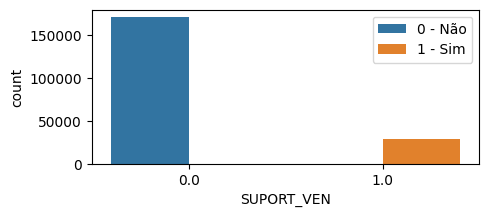

In [25]:
sns.countplot(data=dados, x='SUPORT_VEN', hue='SUPORT_VEN')
plt.legend(labels = ['0 - Não', '1 - Sim']);

### Variável `CS_SEXO`

Vamos mudar os valores da variável sexo (`CS_SEXO`) de 'M/F' para 0/1.

In [26]:
dados['CS_SEXO'] = dados['CS_SEXO'].replace({'M':0, 'F':1, 'I':np.nan})

In [27]:
dados['CS_SEXO'].value_counts()

1.0    100107
0.0     99337
Name: CS_SEXO, dtype: int64

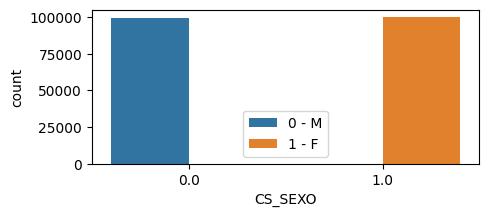

In [28]:
sns.countplot(data=dados, x='CS_SEXO', hue='CS_SEXO')
plt.legend(labels = ['0 - M', '1 - F']);

### Variável `SG_UF_INTE`

Vamos transformar os valores das variáveis `SG_UF_INTE` (unidade federativa da internação do paciente) para região considerando `0-Sul`, `1-Sudeste`, `2-Centro-Oeste`, `3-Norte`, `4-Nordeste`.

In [29]:
sigla_uf = {'DF':2, 'RJ':1, 'TO':3, 'SP':1, 'SC':0, 'BA':4, 'PA':3, 'MG':1,
           'GO':2, 'PR':0, 'RS':0, 'PI':4, 'ES':1, 'RO':3, 'PB':4, 'AM':3,
           'AL':4, 'RN':4, 'CE':4, 'MS':2, 'AP':3, 'MA':4, 'RR':3, 'MT':2,
           'SE':4, 'PE':4, 'AC':3}

dados['REGIAO'] = dados['SG_UF_INTE'].replace(sigla_uf)
dados.drop(['SG_UF_INTE'], axis=1, inplace=True)

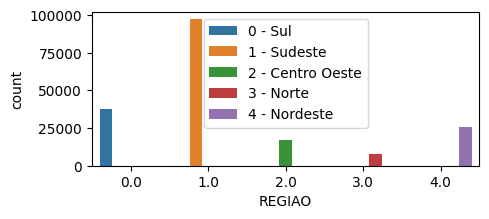

In [30]:
sns.countplot(data=dados, x='REGIAO', hue='REGIAO')
plt.legend(labels = ['0 - Sul','1 - Sudeste','2 - Centro Oeste','3 - Norte','4 - Nordeste']);

### Variável `CS_ZONA`

A variável `CS_ZONA` tem quatro categorias (`1-Urbana`, `2-Rural`, `3-Periurbana` e `9-Ignorado`) mas não há observações para `Rural`, pois provávelmente essas observações foram descartadas em algum tratamento anterior, portanto vamos descartar toda essa variável.

In [31]:
dados.drop(['CS_ZONA'], axis=1, inplace=True)

### Variável `CS_RACA`

A variável `CS_RACA` tem cinco categorias (`1-Branca`, `2-Preta`, `3-Amarela`, `4-Parda`, `5-Indígena`) mas vamos mudar `1` para `0`, juntar as observações `2` e `4` apenas em `1`, mudar `3` para `2` e vamos mudar `5` para `3`.

In [32]:
dados['CS_RACA'] = dados['CS_RACA'].replace({1:0,2:1,3:2,4:1,5:3})

In [33]:
dados['CS_RACA'].value_counts()

0.0    104550
1.0     60045
2.0      2022
3.0       262
Name: CS_RACA, dtype: int64

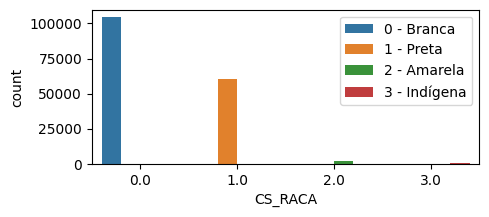

In [34]:
sns.countplot(data=dados, x='CS_RACA', hue='CS_RACA')
plt.legend(labels = ['0 - Branca','1 - Preta','2 - Amarela','3 - Indígena']);

### Variável `VACINA_COV`

Vamos trocar `2` por `0` e `np.nan` por `0`.

In [35]:
dados['VACINA_COV'] = dados['VACINA_COV'].replace({np.nan:0, 2:0})

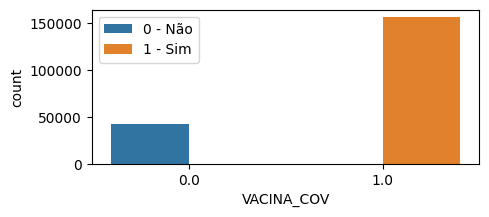

In [36]:
sns.countplot(data=dados, x='VACINA_COV', hue='VACINA_COV')
plt.legend(labels = ['0 - Não','1 - Sim']);

### Vamos converter as variáveis para os tipos adequados de dados.

In [37]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199453 entries, 7 to 556435
Data columns (total 36 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CS_SEXO     199444 non-null  float64
 1   NU_IDADE_N  199453 non-null  int64  
 2   CS_RACA     166879 non-null  float64
 3   CS_ESCOL_N  64204 non-null   float64
 4   NOSOCOMIAL  199453 non-null  float64
 5   FEBRE       199453 non-null  float64
 6   TOSSE       199453 non-null  float64
 7   GARGANTA    199453 non-null  float64
 8   DISPNEIA    199453 non-null  float64
 9   DESC_RESP   199453 non-null  float64
 10  SATURACAO   199453 non-null  float64
 11  DIARREIA    199453 non-null  float64
 12  VOMITO      199453 non-null  float64
 13  OUTRO_SIN   199453 non-null  float64
 14  PUERPERA    199453 non-null  float64
 15  CARDIOPATI  199453 non-null  float64
 16  HEMATOLOGI  199453 non-null  float64
 17  SIND_DOWN   199453 non-null  float64
 18  HEPATICA    199453 non-null  float64
 19  AS

In [38]:
for var in dados.columns:
    dados[var] = dados[var].astype('Int32')

Vamos excluir dados faltantes para a variável `EVOLUCAO`, pois não temos como imputá-los e também para a variável `CS_SEXO` pois são poucos. Vamos manter os demais, por enquanto.

In [39]:
print(f'O dataset contém {dados.shape[0]} linhas e {dados.shape[1]} colunas')

O dataset contém 199453 linhas e 36 colunas


In [40]:
dados_na = dados.isna().sum()
dados_na[dados_na > 0]

CS_SEXO            9
CS_RACA        32574
CS_ESCOL_N    135249
EVOLUCAO       10109
REGIAO         13490
dtype: int64

In [41]:
dados.dropna(inplace=True)

In [42]:
print(f'O dataset contém {dados.shape[0]} linhas e {dados.shape[1]} colunas')

O dataset contém 57016 linhas e 36 colunas


# Análise Descritiva

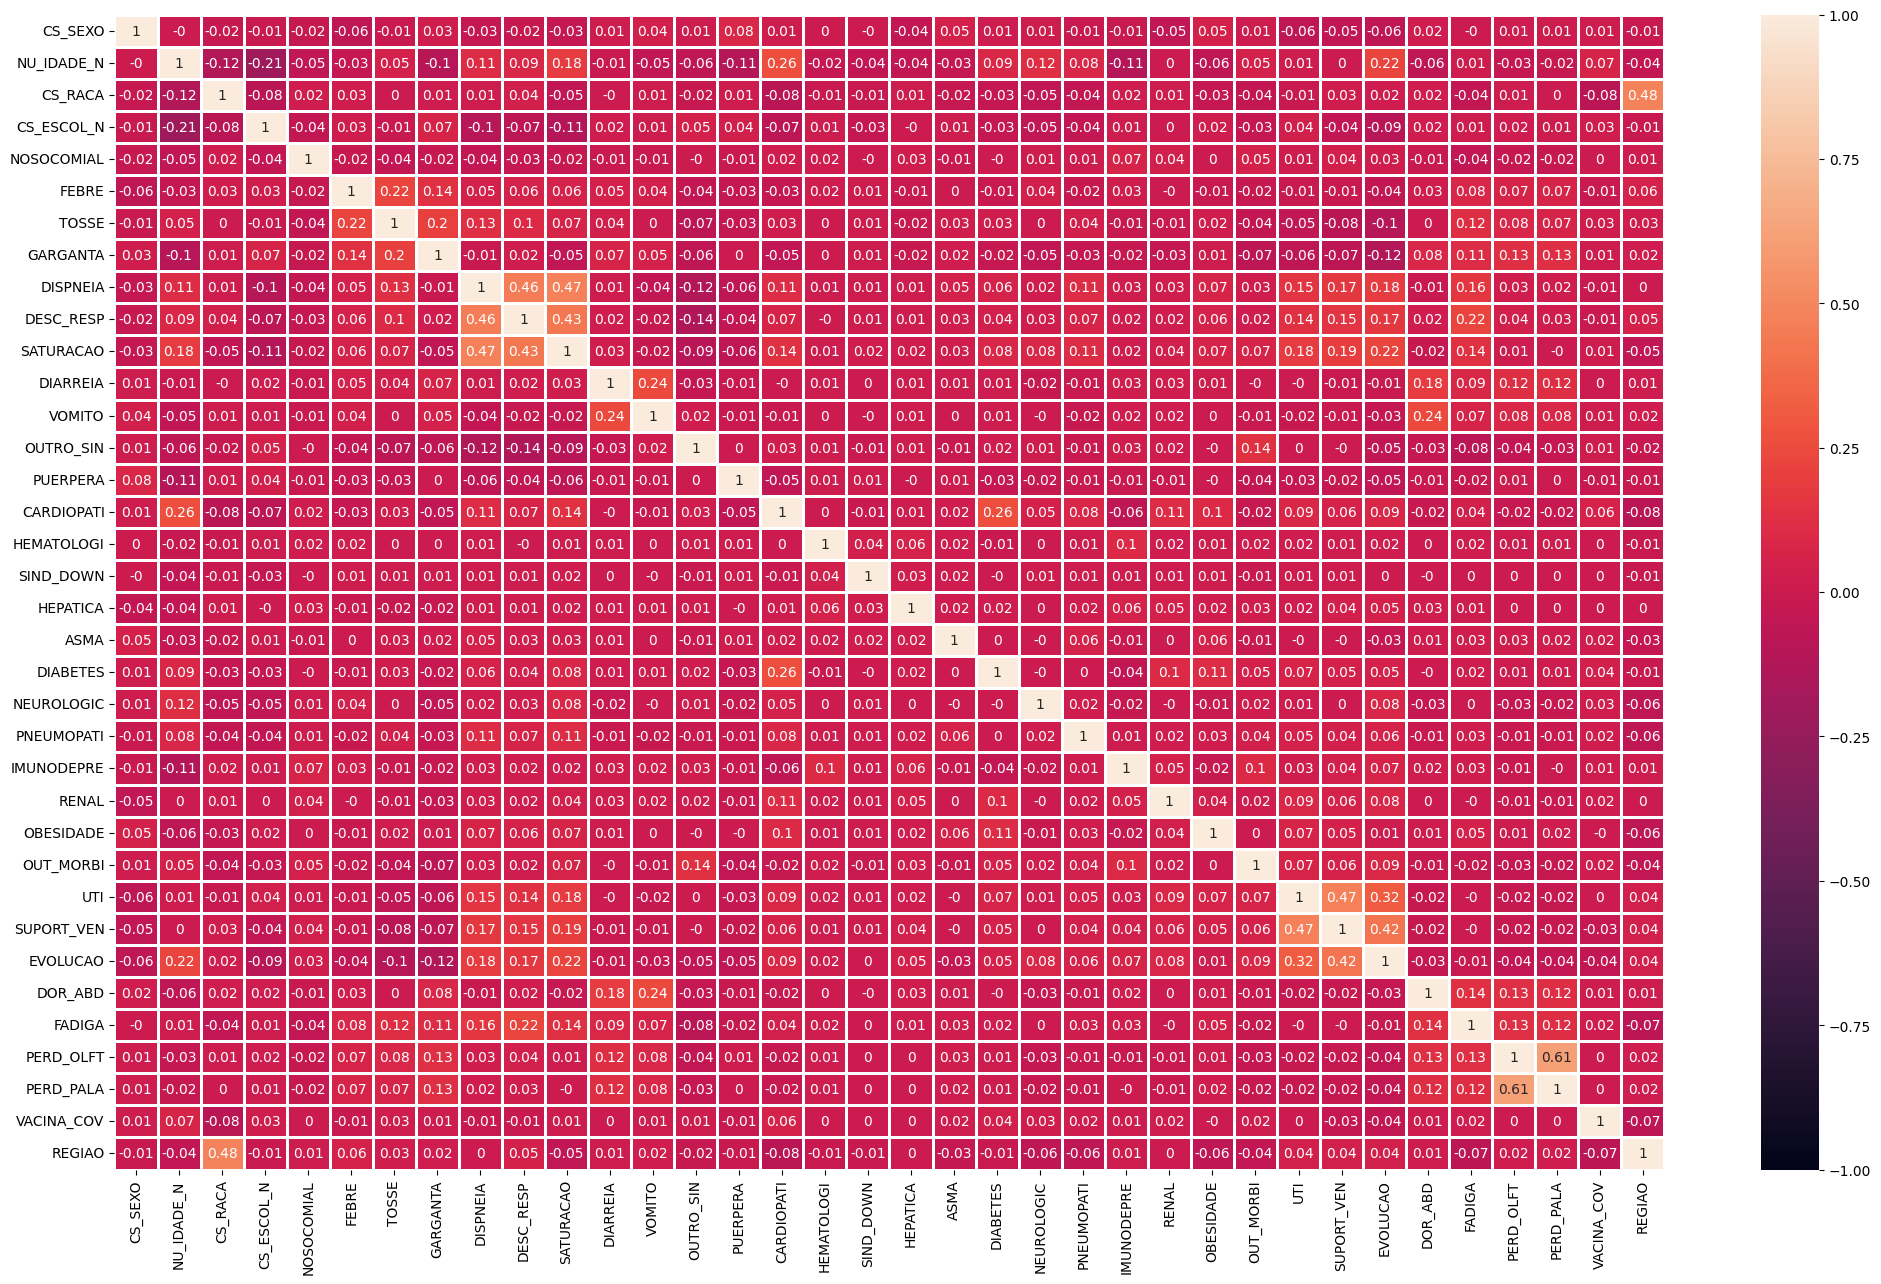

In [43]:
plt.figure(figsize=(25,15))
sns.heatmap(round(dados.corr(method='spearman'), 2),
            vmin=-1,vmax=1, annot=True, linewidths = 2);

In [44]:
dados['CS_ESCOL_N'].value_counts()

1    20048
0    17132
3    13488
4     6348
Name: CS_ESCOL_N, dtype: Int64

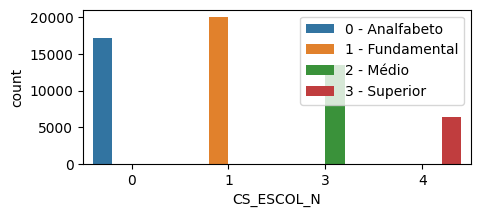

In [45]:
sns.countplot(data=dados, x='CS_ESCOL_N', hue='CS_ESCOL_N')
plt.legend(labels = ['0 - Analfabeto','1 - Fundamental','2 - Médio',
                     '3 - Superior','4 - Não se aplica']);

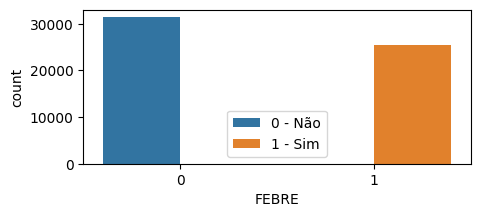

In [46]:
sns.countplot(data=dados, x='FEBRE', hue='FEBRE')
plt.legend(labels = ['0 - Não','1 - Sim']);

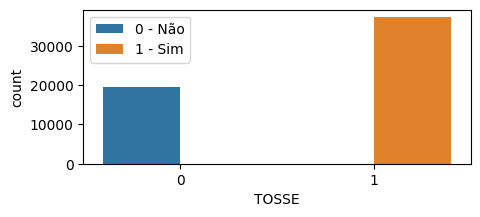

In [47]:
sns.countplot(data=dados, x='TOSSE', hue='TOSSE')
plt.legend(labels = ['0 - Não','1 - Sim']);

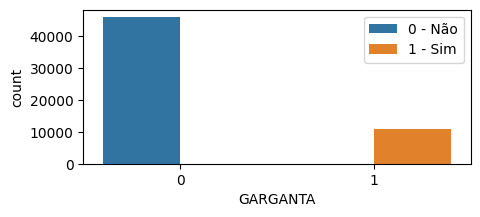

In [48]:
sns.countplot(data=dados, x='GARGANTA', hue='GARGANTA')
plt.legend(labels = ['0 - Não','1 - Sim']);

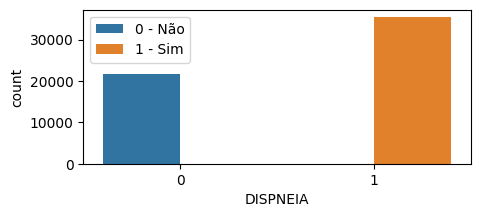

In [49]:
sns.countplot(data=dados, x='DISPNEIA', hue='DISPNEIA')
plt.legend(labels = ['0 - Não','1 - Sim']);

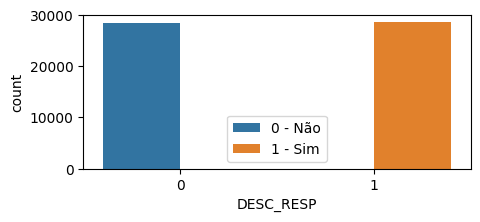

In [50]:
sns.countplot(data=dados, x='DESC_RESP', hue='DESC_RESP')
plt.legend(labels = ['0 - Não','1 - Sim']);

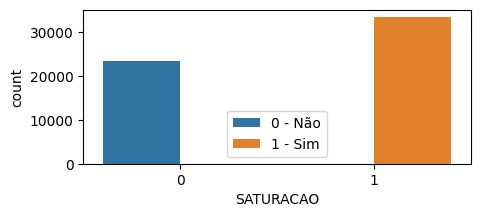

In [51]:
sns.countplot(data=dados, x='SATURACAO', hue='SATURACAO')
plt.legend(labels = ['0 - Não','1 - Sim']);

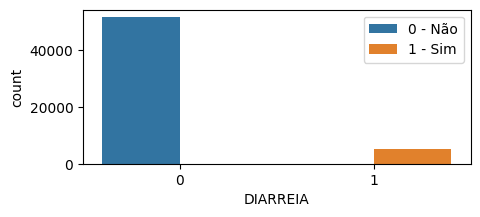

In [52]:
sns.countplot(data=dados, x='DIARREIA', hue='DIARREIA')
plt.legend(labels = ['0 - Não','1 - Sim']);

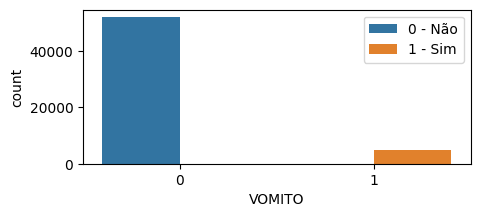

In [53]:
sns.countplot(data=dados, x='VOMITO', hue='VOMITO')
plt.legend(labels = ['0 - Não','1 - Sim']);

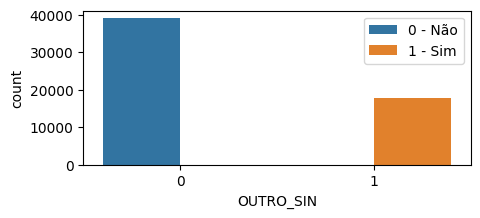

In [54]:
sns.countplot(data=dados, x='OUTRO_SIN', hue='OUTRO_SIN')
plt.legend(labels = ['0 - Não','1 - Sim']);

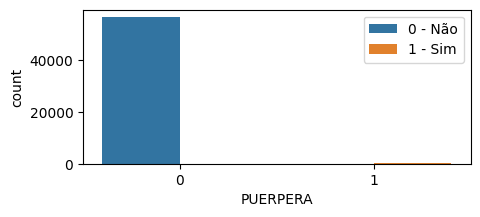

In [55]:
sns.countplot(data=dados, x='PUERPERA', hue='PUERPERA')
plt.legend(labels = ['0 - Não','1 - Sim']);

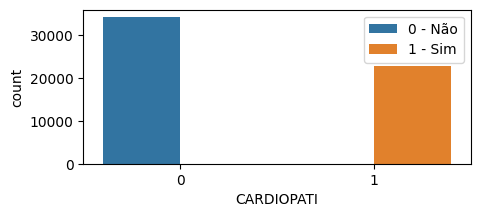

In [56]:
sns.countplot(data=dados, x='CARDIOPATI', hue='CARDIOPATI')
plt.legend(labels = ['0 - Não','1 - Sim']);

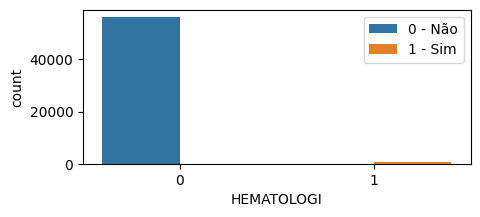

In [57]:
sns.countplot(data=dados, x='HEMATOLOGI', hue='HEMATOLOGI')
plt.legend(labels = ['0 - Não','1 - Sim']);

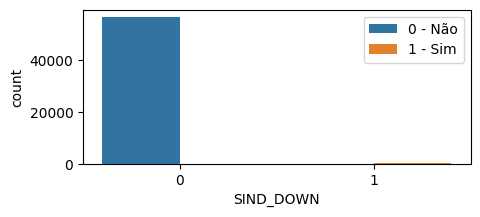

In [58]:
sns.countplot(data=dados, x='SIND_DOWN', hue='SIND_DOWN')
plt.legend(labels = ['0 - Não','1 - Sim']);

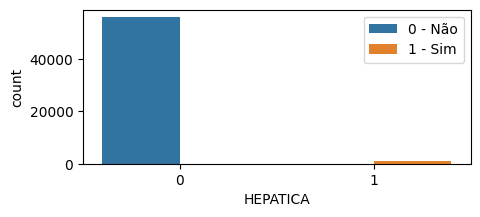

In [59]:
sns.countplot(data=dados, x='HEPATICA', hue='HEPATICA')
plt.legend(labels = ['0 - Não','1 - Sim']);

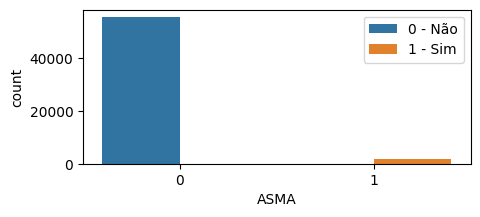

In [60]:
sns.countplot(data=dados, x='ASMA', hue='ASMA')
plt.legend(labels = ['0 - Não','1 - Sim']);

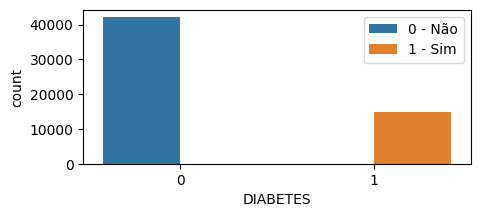

In [61]:
sns.countplot(data=dados, x='DIABETES', hue='DIABETES')
plt.legend(labels = ['0 - Não','1 - Sim']);

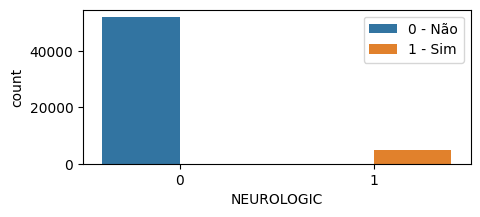

In [62]:
sns.countplot(data=dados, x='NEUROLOGIC', hue='NEUROLOGIC')
plt.legend(labels = ['0 - Não','1 - Sim']);

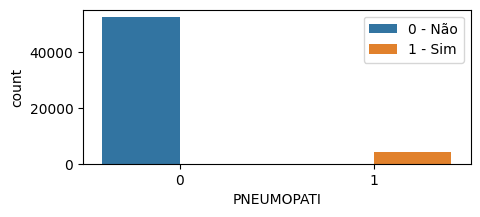

In [63]:
sns.countplot(data=dados, x='PNEUMOPATI', hue='PNEUMOPATI')
plt.legend(labels = ['0 - Não','1 - Sim']);

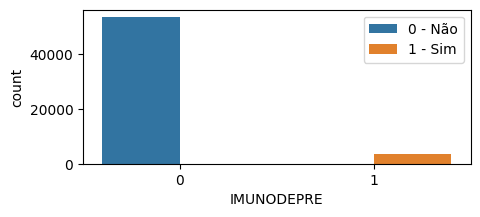

In [64]:
sns.countplot(data=dados, x='IMUNODEPRE', hue='IMUNODEPRE')
plt.legend(labels = ['0 - Não','1 - Sim']);

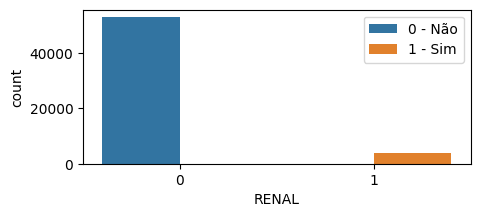

In [65]:
sns.countplot(data=dados, x='RENAL', hue='RENAL')
plt.legend(labels = ['0 - Não','1 - Sim']);

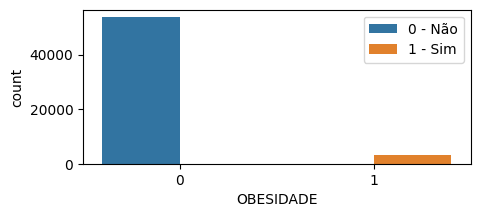

In [66]:
sns.countplot(data=dados, x='OBESIDADE', hue='OBESIDADE')
plt.legend(labels = ['0 - Não','1 - Sim']);

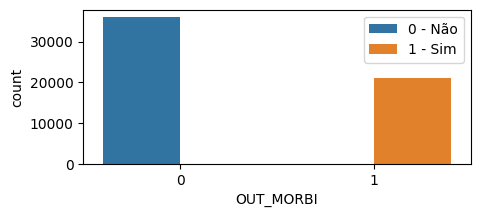

In [67]:
sns.countplot(data=dados, x='OUT_MORBI', hue='OUT_MORBI')
plt.legend(labels = ['0 - Não','1 - Sim']);

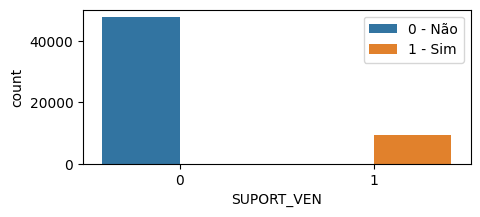

In [68]:
sns.countplot(data=dados, x='SUPORT_VEN', hue='SUPORT_VEN')
plt.legend(labels = ['0 - Não','1 - Sim']);

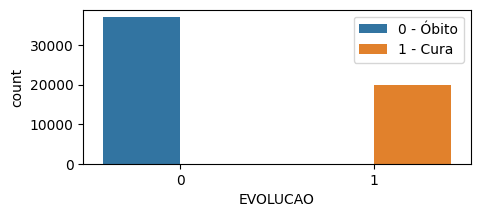

In [69]:
sns.countplot(data=dados, x='EVOLUCAO', hue='EVOLUCAO')
plt.legend(labels = ['0 - Óbito','1 - Cura']);

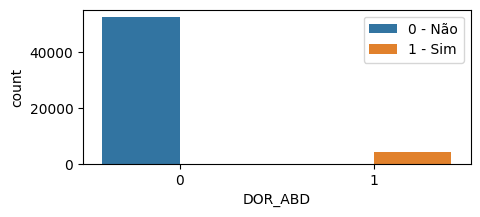

In [70]:
sns.countplot(data=dados, x='DOR_ABD', hue='DOR_ABD')
plt.legend(labels = ['0 - Não','1 - Sim']);

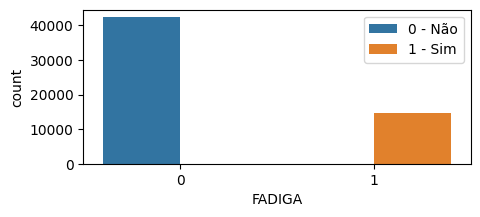

In [71]:
sns.countplot(data=dados, x='FADIGA', hue='FADIGA')
plt.legend(labels = ['0 - Não','1 - Sim']);

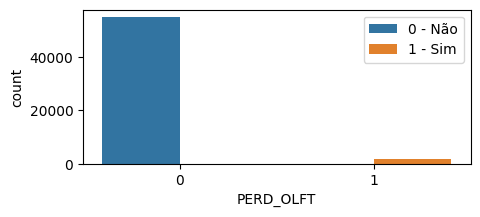

In [72]:
sns.countplot(data=dados, x='PERD_OLFT', hue='PERD_OLFT')
plt.legend(labels = ['0 - Não','1 - Sim']);

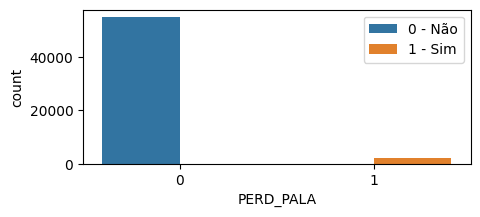

In [73]:
sns.countplot(data=dados, x='PERD_PALA', hue='PERD_PALA')
plt.legend(labels = ['0 - Não','1 - Sim']);

## Verificando associação entre as variáveis preditoras e variável alvo

### Teste Qui-Quadrado de Pearson
O teste Qui-Quadrado é um teste de hipótese que assume como hipótese nula que frequências observadas para variáveis categóricas seguem frequências esperadas. O teste calcula uma estatística que segue uma distribuição Qui-Quadrado.

Este teste é calculado para uma tabela de contingência, primeiramente calculando a frequência esperada para cada grupo e então determinando se a divisão dos grupos afetou a frequência esperada.

As variáveis são consideradas independentes se as frequências observadas são similares.

Se a estatística gerada pelo teste for maior ou igual a um dado valor crítico, então rejeita-se a hipótese nula, ou seja, as amostras são dependentes.

A quantidade de graus ed liberdade para uma tabela de contingência é dada por (número de colunas - 1) * (número de linhas - 1)

O teste Qui-Quadrado de Pearson pode ser calculado em Python usando a função chi2_contingency() do pacote SciPy.

A função recebe um array como tabela de contingência e retorna a estatística calculada e o p-valor, bem como os graus de liberdade e a tabela de frequências esperadas.

* Vamos verificar se há associação entre as variáveis `CS_SEXO` e `EVOLUCAO`.

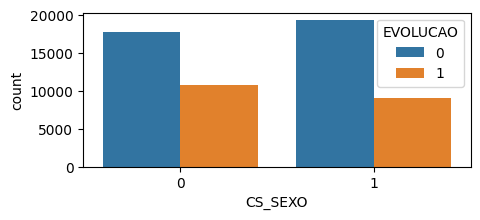

In [74]:
sns.countplot(x=dados['CS_SEXO'], hue=dados['EVOLUCAO']);

In [75]:
df2 = dados.groupby(by=['CS_SEXO', 'EVOLUCAO']).size().reset_index(name='counts')
df2

,CS_SEXO,EVOLUCAO,counts
0,0,0,17762
1,0,1,10804
2,1,0,19351
3,1,1,9099


In [76]:
tabela_cont = df2.pivot("EVOLUCAO", "CS_SEXO", "counts")
tabela_cont

CS_SEXO,0,1
EVOLUCAO,,
0,17762,19351
1,10804,9099


In [77]:
tabela2 = tabela_cont / tabela_cont.sum()
tabela2

CS_SEXO,0,1
EVOLUCAO,,
0,0.621788,0.680176
1,0.378212,0.319824


In [78]:
stat, p, dof, expected = chi2_contingency(tabela_cont)

prob = 0.95
print(f'p-valor: {p}')
print(f'qui-quadrado: {stat}')
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependente (rejeita H0)')
else:
    print('Independente (não rejeita H0)')

p-valor: 2.2504433769104928e-48
qui-quadrado: 213.60096597116816
Dependente (rejeita H0)


* Vamos verificar se há associação entre as variáveis `CS_RACA` e `EVOLUCAO`.

In [79]:
df2 = dados.groupby(by=['CS_RACA', 'EVOLUCAO']).size().reset_index(name='counts')
tabela_cont = df2.pivot("EVOLUCAO", "CS_RACA", "counts")
tabela_cont

CS_RACA,0,1,2,3
EVOLUCAO,,,,
0,25600,11094,355,64
1,13362,6315,193,33


In [80]:
tabela2 = tabela_cont / tabela_cont.sum()
tabela2

CS_RACA,0,1,2,3
EVOLUCAO,,,,
0,0.65705,0.637257,0.64781,0.659794
1,0.34295,0.362743,0.35219,0.340206


In [81]:
stat, p, dof, expected = chi2_contingency(tabela_cont)

prob = 0.95
print(f'p-valor: {p}')
print(f'qui-quadrado: {stat}')
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependente (rejeita H0)')
else:
    print('Independente (não rejeita H0)')

p-valor: 0.00011557983700326971
qui-quadrado: 20.804694224537904
Dependente (rejeita H0)


* Vamos verificar se há associação entre as variáveis `CS_ESCOL_N` e `EVOLUCAO`.

In [82]:
df2 = dados.groupby(by=['CS_ESCOL_N', 'EVOLUCAO']).size().reset_index(name='counts')
tabela_cont = df2.pivot("EVOLUCAO", "CS_ESCOL_N", "counts")
tabela_cont

CS_ESCOL_N,0,1,3,4
EVOLUCAO,,,,
0,10573,12237,9586,4717
1,6559,7811,3902,1631


In [83]:
tabela2 = tabela_cont / tabela_cont.sum()
tabela2

CS_ESCOL_N,0,1,3,4
EVOLUCAO,,,,
0,0.617149,0.610385,0.710706,0.743069
1,0.382851,0.389615,0.289294,0.256931


In [84]:
stat, p, dof, expected = chi2_contingency(tabela_cont)

prob = 0.95
print(f'p-valor: {p}')
print(f'qui-quadrado: {stat}')
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependente (rejeita H0)')
else:
    print('Independente (não rejeita H0)')

p-valor: 3.8079534826807305e-147
qui-quadrado: 680.3598057843498
Dependente (rejeita H0)


* Vamos verificar se há associação entre as variáveis `NOSOCOMIAL` e `EVOLUCAO`.

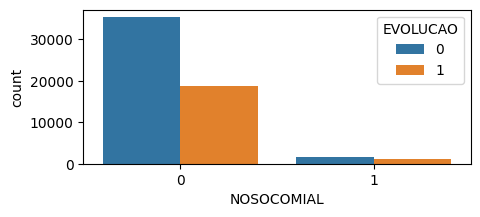

In [85]:
sns.countplot(x=dados['NOSOCOMIAL'], hue=dados['EVOLUCAO']);

In [86]:
df2 = dados.groupby(by=['NOSOCOMIAL', 'EVOLUCAO']).size().reset_index(name='counts')
tabela_cont = df2.pivot("EVOLUCAO", "NOSOCOMIAL", "counts")
tabela_cont

NOSOCOMIAL,0,1
EVOLUCAO,,
0,35410,1703
1,18751,1152


In [87]:
tabela2 = tabela_cont / tabela_cont.sum()
tabela2

NOSOCOMIAL,0,1
EVOLUCAO,,
0,0.653791,0.596497
1,0.346209,0.403503


In [88]:
stat, p, dof, expected = chi2_contingency(tabela_cont)

prob = 0.95
print(f'p-valor: {p}')
print(f'qui-quadrado: {stat}')
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependente (rejeita H0)')
else:
    print('Independente (não rejeita H0)')

p-valor: 4.39664137139419e-10
qui-quadrado: 38.92828358595236
Dependente (rejeita H0)


* Vamos verificar se há associação entre as variáveis `FEBRE` e `EVOLUCAO`.

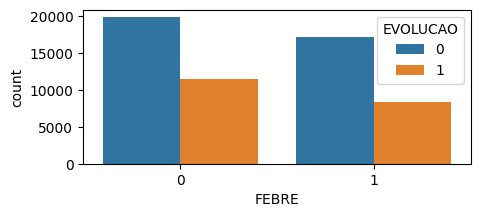

In [89]:
sns.countplot(x=dados['FEBRE'], hue=dados['EVOLUCAO']);

In [90]:
df2 = dados.groupby(by=['FEBRE', 'EVOLUCAO']).size().reset_index(name='counts')
tabela_cont = df2.pivot("EVOLUCAO", "FEBRE", "counts")
tabela_cont

FEBRE,0,1
EVOLUCAO,,
0,19921,17192
1,11535,8368


In [91]:
tabela2 = tabela_cont / tabela_cont.sum()
tabela2

FEBRE,0,1
EVOLUCAO,,
0,0.633297,0.672613
1,0.366703,0.327387


In [92]:
stat, p, dof, expected = chi2_contingency(tabela_cont)

prob = 0.95
print(f'p-valor: {p}')
print(f'qui-quadrado: {stat}')
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependente (rejeita H0)')
else:
    print('Independente (não rejeita H0)')

p-valor: 1.2982376406183655e-22
qui-quadrado: 95.75795542212191
Dependente (rejeita H0)


* Vamos verificar se há associação entre as variáveis `TOSSE` e `EVOLUCAO`.

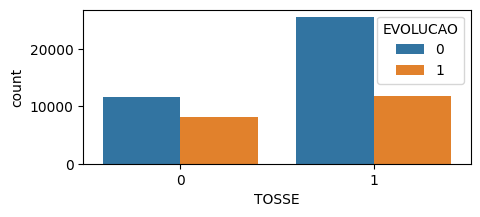

In [93]:
sns.countplot(x=dados['TOSSE'], hue=dados['EVOLUCAO']);

In [94]:
df2 = dados.groupby(by=['TOSSE', 'EVOLUCAO']).size().reset_index(name='counts')
tabela_cont = df2.pivot("EVOLUCAO", "TOSSE", "counts")
tabela_cont

TOSSE,0,1
EVOLUCAO,,
0,11548,25565
1,8112,11791


In [95]:
tabela2 = tabela_cont / tabela_cont.sum()
tabela2

TOSSE,0,1
EVOLUCAO,,
0,0.587386,0.684361
1,0.412614,0.315639


In [96]:
stat, p, dof, expected = chi2_contingency(tabela_cont)

prob = 0.95
print(f'p-valor: {p}')
print(f'qui-quadrado: {stat}')
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependente (rejeita H0)')
else:
    print('Independente (não rejeita H0)')

p-valor: 7.341373037385119e-118
qui-quadrado: 532.6897711835848
Dependente (rejeita H0)


* Vamos verificar se há associação entre as variáveis `GARGANTA` e `EVOLUCAO`.

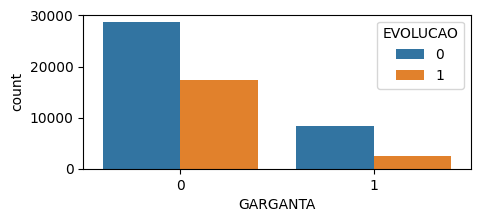

In [97]:
sns.countplot(x=dados['GARGANTA'], hue=dados['EVOLUCAO']);

In [98]:
df2 = dados.groupby(by=['GARGANTA', 'EVOLUCAO']).size().reset_index(name='counts')
tabela_cont = df2.pivot("EVOLUCAO", "GARGANTA", "counts")
tabela_cont

GARGANTA,0,1
EVOLUCAO,,
0,28704,8409
1,17408,2495


In [99]:
tabela2 = tabela_cont / tabela_cont.sum()
tabela2

GARGANTA,0,1
EVOLUCAO,,
0,0.622484,0.771185
1,0.377516,0.228815


In [100]:
stat, p, dof, expected = chi2_contingency(tabela_cont)

prob = 0.95
print(f'p-valor: {p}')
print(f'qui-quadrado: {stat}')
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependente (rejeita H0)')
else:
    print('Independente (não rejeita H0)')

p-valor: 1.683268612440543e-188
qui-quadrado: 857.5225642167637
Dependente (rejeita H0)


* Vamos verificar se há associação entre as variáveis `DISPNEIA` e `EVOLUCAO`.

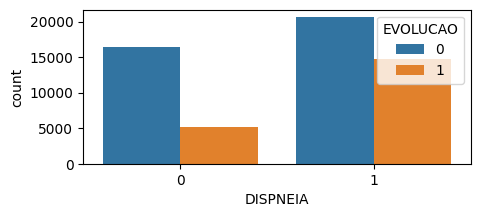

In [101]:
sns.countplot(x=dados['DISPNEIA'], hue=dados['EVOLUCAO']);

In [102]:
df2 = dados.groupby(by=['DISPNEIA', 'EVOLUCAO']).size().reset_index(name='counts')
tabela_cont = df2.pivot("EVOLUCAO", "DISPNEIA", "counts")
tabela_cont

DISPNEIA,0,1
EVOLUCAO,,
0,16478,20635
1,5116,14787


In [103]:
tabela2 = tabela_cont / tabela_cont.sum()
tabela2

DISPNEIA,0,1
EVOLUCAO,,
0,0.763082,0.582548
1,0.236918,0.417452


In [104]:
stat, p, dof, expected = chi2_contingency(tabela_cont)

prob = 0.95
print(f'p-valor: {p}')
print(f'qui-quadrado: {stat}')
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependente (rejeita H0)')
else:
    print('Independente (não rejeita H0)')

p-valor: 0.0
qui-quadrado: 1923.5376473769584
Dependente (rejeita H0)


* Vamos verificar se há associação entre as variáveis `DESC_RESP` e `EVOLUCAO`.

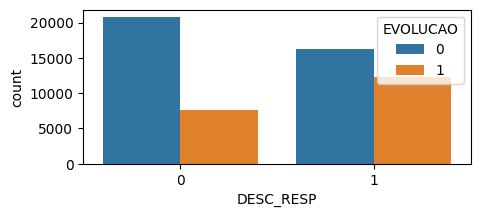

In [105]:
sns.countplot(x=dados['DESC_RESP'], hue=dados['EVOLUCAO']);

In [106]:
df2 = dados.groupby(by=['DESC_RESP', 'EVOLUCAO']).size().reset_index(name='counts')
tabela_cont = df2.pivot("EVOLUCAO", "DESC_RESP", "counts")
tabela_cont

DESC_RESP,0,1
EVOLUCAO,,
0,20798,16315
1,7589,12314


In [107]:
tabela2 = tabela_cont / tabela_cont.sum()
tabela2

DESC_RESP,0,1
EVOLUCAO,,
0,0.732659,0.569877
1,0.267341,0.430123


In [108]:
stat, p, dof, expected = chi2_contingency(tabela_cont)

prob = 0.95
print(f'p-valor: {p}')
print(f'qui-quadrado: {stat}')
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependente (rejeita H0)')
else:
    print('Independente (não rejeita H0)')

p-valor: 0.0
qui-quadrado: 1661.5242233073072
Dependente (rejeita H0)


* Vamos verificar se há associação entre as variáveis `SATURACAO` e `EVOLUCAO`.

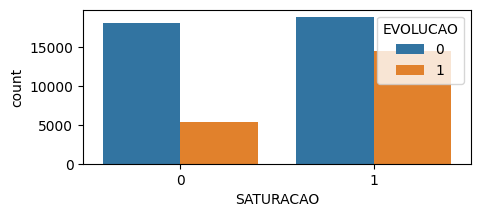

In [109]:
sns.countplot(x=dados['SATURACAO'], hue=dados['EVOLUCAO']);

In [110]:
df2 = dados.groupby(by=['SATURACAO', 'EVOLUCAO']).size().reset_index(name='counts')
tabela_cont = df2.pivot("EVOLUCAO", "SATURACAO", "counts")
tabela_cont

SATURACAO,0,1
EVOLUCAO,,
0,18202,18911
1,5337,14566


In [111]:
tabela2 = tabela_cont / tabela_cont.sum()
tabela2

SATURACAO,0,1
EVOLUCAO,,
0,0.77327,0.564895
1,0.22673,0.435105


In [112]:
stat, p, dof, expected = chi2_contingency(tabela_cont)

prob = 0.95
print(f'p-valor: {p}')
print(f'qui-quadrado: {stat}')
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependente (rejeita H0)')
else:
    print('Independente (não rejeita H0)')

p-valor: 0.0
qui-quadrado: 2640.1304801781066
Dependente (rejeita H0)


* Vamos verificar se há associação entre as variáveis `DIARREIA` e `EVOLUCAO`.

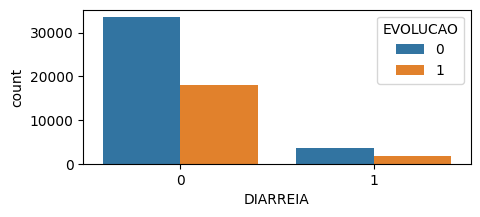

In [113]:
sns.countplot(x=dados['DIARREIA'], hue=dados['EVOLUCAO']);

In [114]:
df2 = dados.groupby(by=['DIARREIA', 'EVOLUCAO']).size().reset_index(name='counts')
tabela_cont = df2.pivot("EVOLUCAO", "DIARREIA", "counts")
tabela_cont

DIARREIA,0,1
EVOLUCAO,,
0,33568,3545
1,18129,1774


In [115]:
tabela2 = tabela_cont / tabela_cont.sum()
tabela2

DIARREIA,0,1
EVOLUCAO,,
0,0.649322,0.666479
1,0.350678,0.333521


In [116]:
stat, p, dof, expected = chi2_contingency(tabela_cont)

prob = 0.95
print(f'p-valor: {p}')
print(f'qui-quadrado: {stat}')
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependente (rejeita H0)')
else:
    print('Independente (não rejeita H0)')

p-valor: 0.012976494869387374
qui-quadrado: 6.172311545359241
Dependente (rejeita H0)


* Vamos verificar se há associação entre as variáveis `VOMITO` e `EVOLUCAO`.

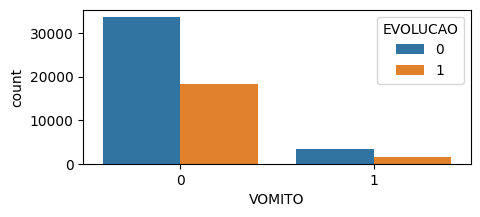

In [117]:
sns.countplot(x=dados['VOMITO'], hue=dados['EVOLUCAO']);

In [118]:
df2 = dados.groupby(by=['VOMITO', 'EVOLUCAO']).size().reset_index(name='counts')
tabela_cont = df2.pivot("EVOLUCAO", "VOMITO", "counts")
tabela_cont

VOMITO,0,1
EVOLUCAO,,
0,33640,3473
1,18393,1510


In [119]:
tabela2 = tabela_cont / tabela_cont.sum()
tabela2

VOMITO,0,1
EVOLUCAO,,
0,0.646513,0.69697
1,0.353487,0.30303


In [120]:
stat, p, dof, expected = chi2_contingency(tabela_cont)

prob = 0.95
print(f'p-valor: {p}')
print(f'qui-quadrado: {stat}')
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependente (rejeita H0)')
else:
    print('Independente (não rejeita H0)')

p-valor: 1.0596515497219356e-12
qui-quadrado: 50.7304062664344
Dependente (rejeita H0)


* Vamos verificar se há associação entre as variáveis `OUTRO_SIN` e `EVOLUCAO`.

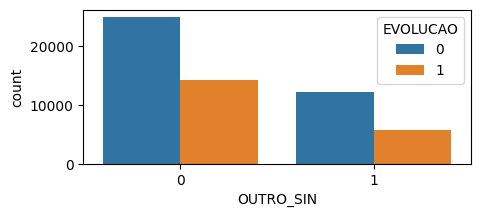

In [121]:
sns.countplot(x=dados['OUTRO_SIN'], hue=dados['EVOLUCAO']);

In [122]:
df2 = dados.groupby(by=['OUTRO_SIN', 'EVOLUCAO']).size().reset_index(name='counts')
tabela_cont = df2.pivot("EVOLUCAO", "OUTRO_SIN", "counts")
tabela_cont

OUTRO_SIN,0,1
EVOLUCAO,,
0,24897,12216
1,14257,5646


In [123]:
tabela2 = tabela_cont / tabela_cont.sum()
tabela2

OUTRO_SIN,0,1
EVOLUCAO,,
0,0.635874,0.68391
1,0.364126,0.31609


In [124]:
stat, p, dof, expected = chi2_contingency(tabela_cont)

prob = 0.95
print(f'p-valor: {p}')
print(f'qui-quadrado: {stat}')
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependente (rejeita H0)')
else:
    print('Independente (não rejeita H0)')

p-valor: 7.0485062333824e-29
qui-quadrado: 124.35381843993025
Dependente (rejeita H0)


* Vamos verificar se há associação entre as variáveis `PUERPERA` e `EVOLUCAO`.

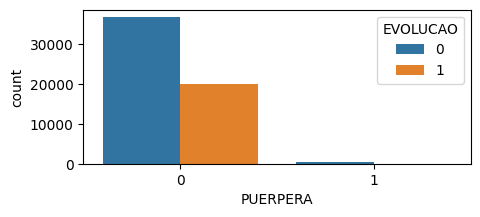

In [125]:
sns.countplot(x=dados['PUERPERA'], hue=dados['EVOLUCAO']);

In [126]:
df2 = dados.groupby(by=['PUERPERA', 'EVOLUCAO']).size().reset_index(name='counts')
tabela_cont = df2.pivot("EVOLUCAO", "PUERPERA", "counts")
tabela_cont

PUERPERA,0,1
EVOLUCAO,,
0,36691,422
1,19859,44


In [127]:
tabela2 = tabela_cont / tabela_cont.sum()
tabela2

PUERPERA,0,1
EVOLUCAO,,
0,0.648824,0.905579
1,0.351176,0.094421


In [128]:
stat, p, dof, expected = chi2_contingency(tabela_cont)

prob = 0.95
print(f'p-valor: {p}')
print(f'qui-quadrado: {stat}')
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependente (rejeita H0)')
else:
    print('Independente (não rejeita H0)')

p-valor: 9.19500465754044e-31
qui-quadrado: 132.96650652319767
Dependente (rejeita H0)


* Vamos verificar se há associação entre as variáveis `CARDIOPATI` e `EVOLUCAO`.

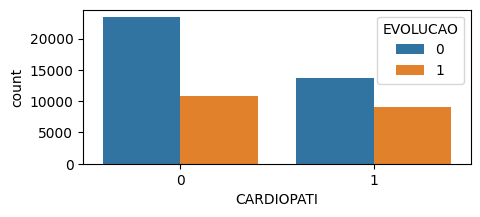

In [129]:
sns.countplot(x=dados['CARDIOPATI'], hue=dados['EVOLUCAO']);

In [130]:
df2 = dados.groupby(by=['CARDIOPATI', 'EVOLUCAO']).size().reset_index(name='counts')
tabela_cont = df2.pivot("EVOLUCAO", "CARDIOPATI", "counts")
tabela_cont

CARDIOPATI,0,1
EVOLUCAO,,
0,23427,13686
1,10802,9101


In [131]:
tabela2 = tabela_cont / tabela_cont.sum()
tabela2

CARDIOPATI,0,1
EVOLUCAO,,
0,0.68442,0.600606
1,0.31558,0.399394


In [132]:
stat, p, dof, expected = chi2_contingency(tabela_cont)

prob = 0.95
print(f'p-valor: {p}')
print(f'qui-quadrado: {stat}')
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependente (rejeita H0)')
else:
    print('Independente (não rejeita H0)')

p-valor: 6.765271377763635e-94
qui-quadrado: 422.559773735529
Dependente (rejeita H0)


* Vamos verificar se há associação entre as variáveis `HEMATOLOGI` e `EVOLUCAO`.

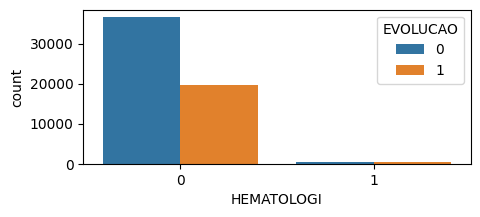

In [133]:
sns.countplot(x=dados['HEMATOLOGI'], hue=dados['EVOLUCAO']);

In [134]:
df2 = dados.groupby(by=['HEMATOLOGI', 'EVOLUCAO']).size().reset_index(name='counts')
tabela_cont = df2.pivot("EVOLUCAO", "HEMATOLOGI", "counts")
tabela_cont

HEMATOLOGI,0,1
EVOLUCAO,,
0,36636,477
1,19541,362


In [135]:
tabela2 = tabela_cont / tabela_cont.sum()
tabela2

HEMATOLOGI,0,1
EVOLUCAO,,
0,0.652153,0.568534
1,0.347847,0.431466


In [136]:
stat, p, dof, expected = chi2_contingency(tabela_cont)

prob = 0.95
print(f'p-valor: {p}')
print(f'qui-quadrado: {stat}')
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependente (rejeita H0)')
else:
    print('Independente (não rejeita H0)')

p-valor: 5.524814745536518e-07
qui-quadrado: 25.071332247663932
Dependente (rejeita H0)


* Vamos verificar se há associação entre as variáveis `SIND_DOWN` e `EVOLUCAO`.

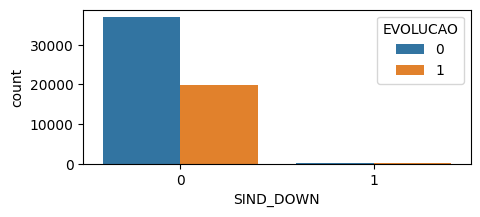

In [137]:
sns.countplot(x=dados['SIND_DOWN'], hue=dados['EVOLUCAO']);

In [138]:
df2 = dados.groupby(by=['SIND_DOWN', 'EVOLUCAO']).size().reset_index(name='counts')
tabela_cont = df2.pivot("EVOLUCAO", "SIND_DOWN", "counts")
tabela_cont

SIND_DOWN,0,1
EVOLUCAO,,
0,36990,123
1,19831,72


In [139]:
tabela2 = tabela_cont / tabela_cont.sum()
tabela2

SIND_DOWN,0,1
EVOLUCAO,,
0,0.650992,0.630769
1,0.349008,0.369231


In [140]:
stat, p, dof, expected = chi2_contingency(tabela_cont)

prob = 0.95
print(f'p-valor: {p}')
print(f'qui-quadrado: {stat}')
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependente (rejeita H0)')
else:
    print('Independente (não rejeita H0)')

p-valor: 0.6057444986993218
qui-quadrado: 0.2664184349616591
Independente (não rejeita H0)


* Vamos verificar se há associação entre as variáveis `HEPATICA` e `EVOLUCAO`.

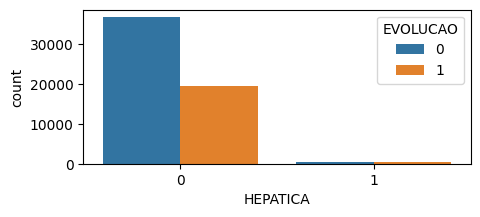

In [141]:
sns.countplot(x=dados['HEPATICA'], hue=dados['EVOLUCAO']);

In [142]:
df2 = dados.groupby(by=['HEPATICA', 'EVOLUCAO']).size().reset_index(name='counts')
tabela_cont = df2.pivot("EVOLUCAO", "HEPATICA", "counts")
tabela_cont

HEPATICA,0,1
EVOLUCAO,,
0,36716,397
1,19421,482


In [143]:
tabela2 = tabela_cont / tabela_cont.sum()
tabela2

HEPATICA,0,1
EVOLUCAO,,
0,0.654043,0.45165
1,0.345957,0.54835


In [144]:
stat, p, dof, expected = chi2_contingency(tabela_cont)

prob = 0.95
print(f'p-valor: {p}')
print(f'qui-quadrado: {stat}')
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependente (rejeita H0)')
else:
    print('Independente (não rejeita H0)')

p-valor: 1.3107839499627037e-35
qui-quadrado: 155.1311611865076
Dependente (rejeita H0)


* Vamos verificar se há associação entre as variáveis `ASMA` e `EVOLUCAO`.

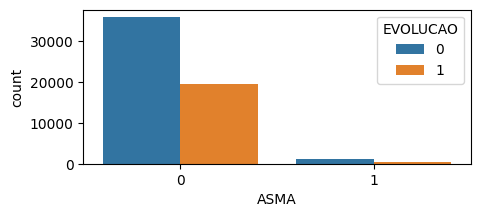

In [145]:
sns.countplot(x=dados['ASMA'], hue=dados['EVOLUCAO']);

In [146]:
df2 = dados.groupby(by=['ASMA', 'EVOLUCAO']).size().reset_index(name='counts')
tabela_cont = df2.pivot("EVOLUCAO", "ASMA", "counts")
tabela_cont

ASMA,0,1
EVOLUCAO,,
0,35938,1175
1,19454,449


In [147]:
tabela2 = tabela_cont / tabela_cont.sum()
tabela2

ASMA,0,1
EVOLUCAO,,
0,0.648794,0.723522
1,0.351206,0.276478


In [148]:
stat, p, dof, expected = chi2_contingency(tabela_cont)

prob = 0.95
print(f'p-valor: {p}')
print(f'qui-quadrado: {stat}')
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependente (rejeita H0)')
else:
    print('Independente (não rejeita H0)')

p-valor: 5.626232306815892e-10
qui-quadrado: 38.44695410411641
Dependente (rejeita H0)


* Vamos verificar se há associação entre as variáveis `DIABETES` e `EVOLUCAO`.

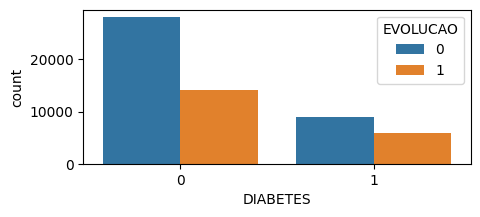

In [149]:
sns.countplot(x=dados['DIABETES'], hue=dados['EVOLUCAO']);

In [150]:
df2 = dados.groupby(by=['DIABETES', 'EVOLUCAO']).size().reset_index(name='counts')
tabela_cont = df2.pivot("EVOLUCAO", "DIABETES", "counts")
tabela_cont

DIABETES,0,1
EVOLUCAO,,
0,28112,9001
1,14072,5831


In [151]:
tabela2 = tabela_cont / tabela_cont.sum()
tabela2

DIABETES,0,1
EVOLUCAO,,
0,0.666414,0.606864
1,0.333586,0.393136


In [152]:
stat, p, dof, expected = chi2_contingency(tabela_cont)

prob = 0.95
print(f'p-valor: {p}')
print(f'qui-quadrado: {stat}')
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependente (rejeita H0)')
else:
    print('Independente (não rejeita H0)')

p-valor: 4.4692540261999234e-39
qui-quadrado: 171.0024044195607
Dependente (rejeita H0)


* Vamos verificar se há associação entre as variáveis `NEUROLOGIC` e `EVOLUCAO`.

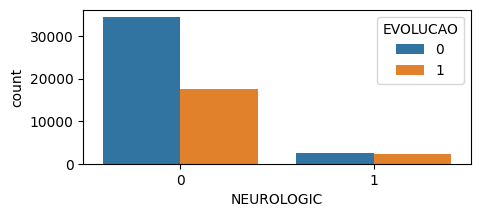

In [153]:
sns.countplot(x=dados['NEUROLOGIC'], hue=dados['EVOLUCAO']);

In [154]:
df2 = dados.groupby(by=['NEUROLOGIC', 'EVOLUCAO']).size().reset_index(name='counts')
tabela_cont = df2.pivot("EVOLUCAO", "NEUROLOGIC", "counts")
tabela_cont

NEUROLOGIC,0,1
EVOLUCAO,,
0,34488,2625
1,17590,2313


In [155]:
tabela2 = tabela_cont / tabela_cont.sum()
tabela2

NEUROLOGIC,0,1
EVOLUCAO,,
0,0.662237,0.531592
1,0.337763,0.468408


In [156]:
stat, p, dof, expected = chi2_contingency(tabela_cont)

prob = 0.95
print(f'p-valor: {p}')
print(f'qui-quadrado: {stat}')
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependente (rejeita H0)')
else:
    print('Independente (não rejeita H0)')

p-valor: 1.5511839825495377e-75
qui-quadrado: 338.22855230962205
Dependente (rejeita H0)


* Vamos verificar se há associação entre as variáveis `PNEUMOPATI` e `EVOLUCAO`.

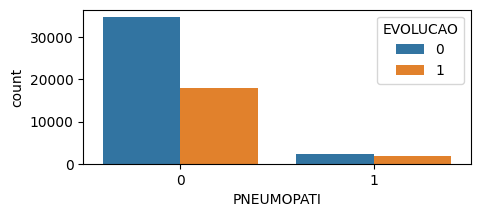

In [157]:
sns.countplot(x=dados['PNEUMOPATI'], hue=dados['EVOLUCAO']);

In [158]:
df2 = dados.groupby(by=['PNEUMOPATI', 'EVOLUCAO']).size().reset_index(name='counts')
tabela_cont = df2.pivot("EVOLUCAO", "PNEUMOPATI", "counts")
tabela_cont

PNEUMOPATI,0,1
EVOLUCAO,,
0,34777,2336
1,17966,1937


In [159]:
tabela2 = tabela_cont / tabela_cont.sum()
tabela2

PNEUMOPATI,0,1
EVOLUCAO,,
0,0.659367,0.546689
1,0.340633,0.453311


In [160]:
stat, p, dof, expected = chi2_contingency(tabela_cont)

prob = 0.95
print(f'p-valor: {p}')
print(f'qui-quadrado: {stat}')
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependente (rejeita H0)')
else:
    print('Independente (não rejeita H0)')

p-valor: 7.50160862418504e-50
qui-quadrado: 220.3723979763884
Dependente (rejeita H0)


* Vamos verificar se há associação entre as variáveis `IMUNODEPRE` e `EVOLUCAO`.

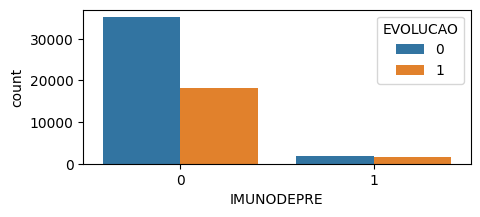

In [161]:
sns.countplot(x=dados['IMUNODEPRE'], hue=dados['EVOLUCAO']);

In [162]:
df2 = dados.groupby(by=['IMUNODEPRE', 'EVOLUCAO']).size().reset_index(name='counts')
tabela_cont = df2.pivot("EVOLUCAO", "IMUNODEPRE", "counts")
tabela_cont

IMUNODEPRE,0,1
EVOLUCAO,,
0,35203,1910
1,18200,1703


In [163]:
tabela2 = tabela_cont / tabela_cont.sum()
tabela2

IMUNODEPRE,0,1
EVOLUCAO,,
0,0.659195,0.528647
1,0.340805,0.471353


In [164]:
stat, p, dof, expected = chi2_contingency(tabela_cont)

prob = 0.95
print(f'p-valor: {p}')
print(f'qui-quadrado: {stat}')
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependente (rejeita H0)')
else:
    print('Independente (não rejeita H0)')

p-valor: 5.0847973147366106e-57
qui-quadrado: 253.24841576950024
Dependente (rejeita H0)


* Vamos verificar se há associação entre as variáveis `RENAL` e `EVOLUCAO`.

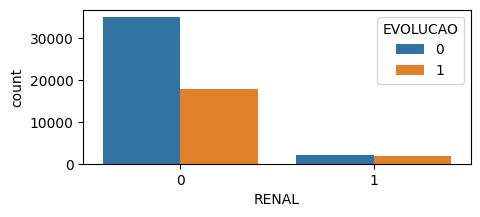

In [165]:
sns.countplot(x=dados['RENAL'], hue=dados['EVOLUCAO']);

In [166]:
df2 = dados.groupby(by=['RENAL', 'EVOLUCAO']).size().reset_index(name='counts')
tabela_cont = df2.pivot("EVOLUCAO", "RENAL", "counts")
tabela_cont

RENAL,0,1
EVOLUCAO,,
0,35111,2002
1,17978,1925


In [167]:
tabela2 = tabela_cont / tabela_cont.sum()
tabela2

RENAL,0,1
EVOLUCAO,,
0,0.661361,0.509804
1,0.338639,0.490196


In [168]:
stat, p, dof, expected = chi2_contingency(tabela_cont)

prob = 0.95
print(f'p-valor: {p}')
print(f'qui-quadrado: {stat}')
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependente (rejeita H0)')
else:
    print('Independente (não rejeita H0)')

p-valor: 3.142501180490905e-82
qui-quadrado: 368.9662450046701
Dependente (rejeita H0)


* Vamos verificar se há associação entre as variáveis `OBESIDADE` e `EVOLUCAO`.

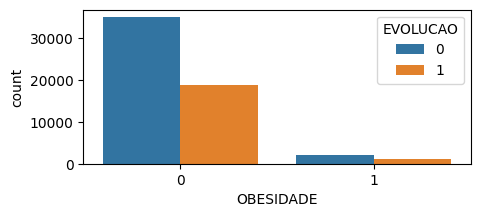

In [169]:
sns.countplot(x=dados['OBESIDADE'], hue=dados['EVOLUCAO']);

In [170]:
df2 = dados.groupby(by=['OBESIDADE', 'EVOLUCAO']).size().reset_index(name='counts')
tabela_cont = df2.pivot("EVOLUCAO", "OBESIDADE", "counts")
tabela_cont

OBESIDADE,0,1
EVOLUCAO,,
0,35058,2055
1,18734,1169


In [171]:
tabela2 = tabela_cont / tabela_cont.sum()
tabela2

OBESIDADE,0,1
EVOLUCAO,,
0,0.651733,0.637407
1,0.348267,0.362593


In [172]:
stat, p, dof, expected = chi2_contingency(tabela_cont)

prob = 0.95
print(f'p-valor: {p}')
print(f'qui-quadrado: {stat}')
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependente (rejeita H0)')
else:
    print('Independente (não rejeita H0)')

p-valor: 0.10132672483532083
qui-quadrado: 2.68453618758882
Independente (não rejeita H0)


* Vamos verificar se há associação entre as variáveis `OUT_MORBI` e `EVOLUCAO`.

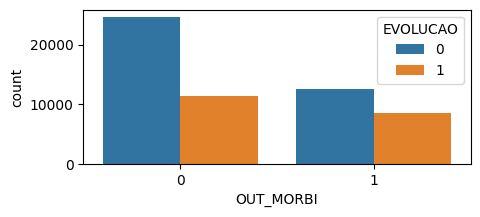

In [173]:
sns.countplot(x=dados['OUT_MORBI'], hue=dados['EVOLUCAO']);

In [174]:
df2 = dados.groupby(by=['OUT_MORBI', 'EVOLUCAO']).size().reset_index(name='counts')
tabela_cont = df2.pivot("EVOLUCAO", "OUT_MORBI", "counts")
tabela_cont

OUT_MORBI,0,1
EVOLUCAO,,
0,24626,12487
1,11429,8474


In [175]:
tabela2 = tabela_cont / tabela_cont.sum()
tabela2

OUT_MORBI,0,1
EVOLUCAO,,
0,0.683012,0.595725
1,0.316988,0.404275


In [176]:
stat, p, dof, expected = chi2_contingency(tabela_cont)

prob = 0.95
print(f'p-valor: {p}')
print(f'qui-quadrado: {stat}')
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependente (rejeita H0)')
else:
    print('Independente (não rejeita H0)')

p-valor: 1.4092112924397661e-98
qui-quadrado: 444.06857742499125
Dependente (rejeita H0)


* Vamos verificar se há associação entre as variáveis `REGIAO` e `EVOLUCAO`.

In [177]:
df2 = dados.groupby(by=['REGIAO', 'EVOLUCAO']).size().reset_index(name='counts')
tabela_cont = df2.pivot("EVOLUCAO", "REGIAO", "counts")
tabela_cont

REGIAO,0,1,2,3,4
EVOLUCAO,,,,,
0,9245,18861,2886,2578,3543
1,3830,11225,1246,1309,2293


In [178]:
tabela2 = tabela_cont / tabela_cont.sum()
tabela2

REGIAO,0,1,2,3,4
EVOLUCAO,,,,,
0,0.707075,0.626903,0.698451,0.663236,0.607094
1,0.292925,0.373097,0.301549,0.336764,0.392906


In [179]:
stat, p, dof, expected = chi2_contingency(tabela_cont)

prob = 0.95
print(f'p-valor: {p}')
print(f'qui-quadrado: {stat}')
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependente (rejeita H0)')
else:
    print('Independente (não rejeita H0)')

p-valor: 1.1564023378794515e-74
qui-quadrado: 350.83768818500454
Dependente (rejeita H0)


* Vamos verificar se há associação entre as variáveis `SUPORT_VEN` e `EVOLUCAO`.

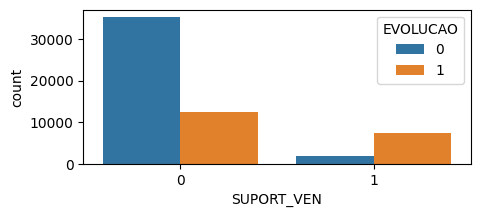

In [180]:
sns.countplot(x=dados['SUPORT_VEN'], hue=dados['EVOLUCAO']);

In [181]:
df2 = dados.groupby(by=['SUPORT_VEN', 'EVOLUCAO']).size().reset_index(name='counts')
tabela_cont = df2.pivot("EVOLUCAO", "SUPORT_VEN", "counts")
tabela_cont

SUPORT_VEN,0,1
EVOLUCAO,,
0,35321,1792
1,12413,7490


In [182]:
tabela2 = tabela_cont / tabela_cont.sum()
tabela2

SUPORT_VEN,0,1
EVOLUCAO,,
0,0.739955,0.193062
1,0.260045,0.806938


In [183]:
stat, p, dof, expected = chi2_contingency(tabela_cont)

prob = 0.95
print(f'p-valor: {p}')
print(f'qui-quadrado: {stat}')
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependente (rejeita H0)')
else:
    print('Independente (não rejeita H0)')

p-valor: 0.0
qui-quadrado: 10226.42700325204
Dependente (rejeita H0)


* Vamos verificar se há associação entre as variáveis `DOR_ABD` e `EVOLUCAO`.

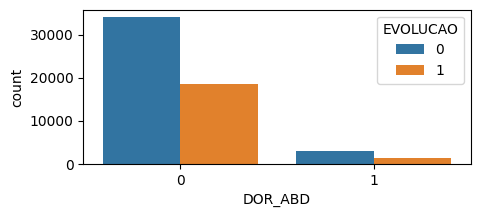

In [184]:
sns.countplot(x=dados['DOR_ABD'], hue=dados['EVOLUCAO']);

In [185]:
df2 = dados.groupby(by=['DOR_ABD', 'EVOLUCAO']).size().reset_index(name='counts')
tabela_cont = df2.pivot("EVOLUCAO", "DOR_ABD", "counts")
tabela_cont

DOR_ABD,0,1
EVOLUCAO,,
0,34063,3050
1,18621,1282


In [186]:
tabela2 = tabela_cont / tabela_cont.sum()
tabela2

DOR_ABD,0,1
EVOLUCAO,,
0,0.646553,0.704063
1,0.353447,0.295937


In [187]:
stat, p, dof, expected = chi2_contingency(tabela_cont)

prob = 0.95
print(f'p-valor: {p}')
print(f'qui-quadrado: {stat}')
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependente (rejeita H0)')
else:
    print('Independente (não rejeita H0)')

p-valor: 2.6059600158993657e-14
qui-quadrado: 58.01145408745867
Dependente (rejeita H0)


* Vamos verificar se há associação entre as variáveis `FADIGA` e `EVOLUCAO`.

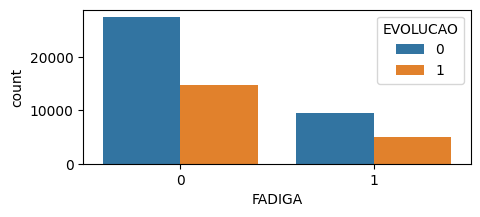

In [188]:
sns.countplot(x=dados['FADIGA'], hue=dados['EVOLUCAO']);

In [189]:
df2 = dados.groupby(by=['FADIGA', 'EVOLUCAO']).size().reset_index(name='counts')
tabela_cont = df2.pivot("EVOLUCAO", "FADIGA", "counts")
tabela_cont

FADIGA,0,1
EVOLUCAO,,
0,27527,9586
1,14860,5043


In [190]:
tabela2 = tabela_cont / tabela_cont.sum()
tabela2

FADIGA,0,1
EVOLUCAO,,
0,0.649421,0.655274
1,0.350579,0.344726


In [191]:
stat, p, dof, expected = chi2_contingency(tabela_cont)

prob = 0.95
print(f'p-valor: {p}')
print(f'qui-quadrado: {stat}')
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependente (rejeita H0)')
else:
    print('Independente (não rejeita H0)')

p-valor: 0.20393193540481536
qui-quadrado: 1.61398929646864
Independente (não rejeita H0)


* Vamos verificar se há associação entre as variáveis `PERD_OLFT` e `EVOLUCAO`.

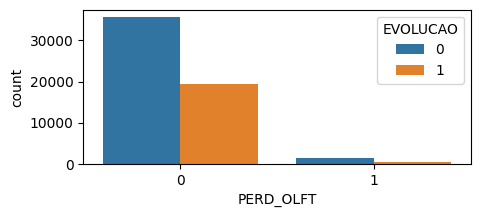

In [192]:
sns.countplot(x=dados['PERD_OLFT'], hue=dados['EVOLUCAO']);

In [193]:
df2 = dados.groupby(by=['PERD_OLFT', 'EVOLUCAO']).size().reset_index(name='counts')
tabela_cont = df2.pivot("EVOLUCAO", "PERD_OLFT", "counts")
tabela_cont

PERD_OLFT,0,1
EVOLUCAO,,
0,35694,1419
1,19409,494


In [194]:
tabela2 = tabela_cont / tabela_cont.sum()
tabela2

PERD_OLFT,0,1
EVOLUCAO,,
0,0.647769,0.741767
1,0.352231,0.258233


In [195]:
stat, p, dof, expected = chi2_contingency(tabela_cont)

prob = 0.95
print(f'p-valor: {p}')
print(f'qui-quadrado: {stat}')
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependente (rejeita H0)')
else:
    print('Independente (não rejeita H0)')

p-valor: 2.802312555813394e-17
qui-quadrado: 71.4789542343714
Dependente (rejeita H0)


* Vamos verificar se há associação entre as variáveis `PERD_PALA` e `EVOLUCAO`.

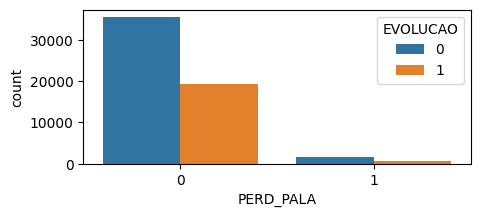

In [196]:
sns.countplot(x=dados['PERD_PALA'], hue=dados['EVOLUCAO']);

In [197]:
df2 = dados.groupby(by=['PERD_PALA', 'EVOLUCAO']).size().reset_index(name='counts')
tabela_cont = df2.pivot("EVOLUCAO", "PERD_PALA", "counts")
tabela_cont

PERD_PALA,0,1
EVOLUCAO,,
0,35559,1554
1,19360,543


In [198]:
tabela2 = tabela_cont / tabela_cont.sum()
tabela2

PERD_PALA,0,1
EVOLUCAO,,
0,0.647481,0.741059
1,0.352519,0.258941


In [199]:
stat, p, dof, expected = chi2_contingency(tabela_cont)

prob = 0.95
print(f'p-valor: {p}')
print(f'qui-quadrado: {stat}')
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependente (rejeita H0)')
else:
    print('Independente (não rejeita H0)')

p-valor: 1.3739810646494375e-18
qui-quadrado: 77.43161659647986
Dependente (rejeita H0)


* Vamos verificar se há associação entre as variáveis `VACINA_COV` e `EVOLUCAO`.

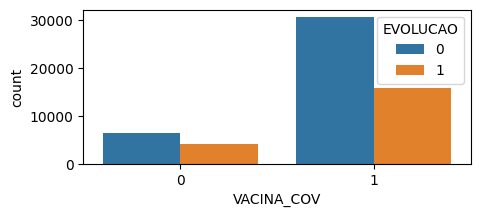

In [200]:
sns.countplot(x=dados['VACINA_COV'], hue=dados['EVOLUCAO']);

In [201]:
df2 = dados.groupby(by=['VACINA_COV', 'EVOLUCAO']).size().reset_index(name='counts')
tabela_cont = df2.pivot("EVOLUCAO", "VACINA_COV", "counts")
tabela_cont

VACINA_COV,0,1
EVOLUCAO,,
0,6487,30626
1,4077,15826


In [202]:
tabela2 = tabela_cont / tabela_cont.sum()
tabela2

VACINA_COV,0,1
EVOLUCAO,,
0,0.614067,0.659304
1,0.385933,0.340696


In [203]:
stat, p, dof, expected = chi2_contingency(tabela_cont)

prob = 0.95
print(f'p-valor: {p}')
print(f'qui-quadrado: {stat}')
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependente (rejeita H0)')
else:
    print('Independente (não rejeita H0)')

p-valor: 1.4570386441108074e-18
qui-quadrado: 77.3156911381101
Dependente (rejeita H0)


Vamos excluir as variáveis SIND_DOWN e FADIGA.

In [204]:
dados.drop(['SIND_DOWN','FADIGA'], axis=1, inplace=True)

# One Hot Encoding

* Vamos aplicar OneHotEncoding para a variável `CS_SEXO`, excluindo as observações da categoria 0.

In [205]:
dados = pd.get_dummies(dados, columns=['CS_SEXO'], prefix='CS_SEXO')
dados.drop('CS_SEXO_0', axis=1, inplace=True)

* Vamos aplicar OneHotEncoding para a variável `CS_RACA`, excluindo as observações da categoria 0.

In [206]:
dados = pd.get_dummies(dados, columns=['CS_RACA'], prefix='CS_RACA')
dados.drop('CS_RACA_0', axis=1, inplace=True)

* Vamos aplicar OneHotEncoding para a variável `CS_ESCOL_N`, excluindo as observações da categoria 0.

In [207]:
dados = pd.get_dummies(dados, columns=['CS_ESCOL_N'], prefix='CS_ESCOL_N')
dados.drop('CS_ESCOL_N_0', axis=1, inplace=True)

* Vamos aplicar OneHotEncoding para a variável `NOSOCOMIAL`, excluindo as observações da categoria 0.

In [208]:
dados = pd.get_dummies(dados, columns=['NOSOCOMIAL'], prefix='NOSOCOMIAL')
dados.drop('NOSOCOMIAL_0', axis=1, inplace=True)

* Vamos aplicar OneHotEncoding para a variável `FEBRE`, excluindo as observações da categoria 0.

In [209]:
dados = pd.get_dummies(dados, columns=['FEBRE'], prefix='FEBRE')
dados.drop('FEBRE_0', axis=1, inplace=True)

* Vamos aplicar OneHotEncoding para a variável `TOSSE`, excluindo as observações da categoria 0.

In [210]:
dados = pd.get_dummies(dados, columns=['TOSSE'], prefix='TOSSE')
dados.drop('TOSSE_0', axis=1, inplace=True)

* Vamos aplicar OneHotEncoding para a variável `GARGANTA`, excluindo as observações da categoria 0.

In [211]:
dados = pd.get_dummies(dados, columns=['GARGANTA'], prefix='GARGANTA')
dados.drop('GARGANTA_0', axis=1, inplace=True)

* Vamos aplicar OneHotEncoding para a variável `DISPNEIA`, excluindo as observações da categoria 0.

In [212]:
dados = pd.get_dummies(dados, columns=['DISPNEIA'], prefix='DISPNEIA')
dados.drop('DISPNEIA_0', axis=1, inplace=True)

* Vamos aplicar OneHotEncoding para a variável `DESC_RESP`, excluindo as observações da categoria 0.

In [213]:
dados = pd.get_dummies(dados, columns=['DESC_RESP'], prefix='DESC_RESP')
dados.drop('DESC_RESP_0', axis=1, inplace=True)

* Vamos aplicar OneHotEncoding para a variável `SATURACAO`, excluindo as observações da categoria 0.

In [214]:
dados = pd.get_dummies(dados, columns=['SATURACAO'], prefix='SATURACAO')
dados.drop('SATURACAO_0', axis=1, inplace=True)

* Vamos aplicar OneHotEncoding para a variável `DIARREIA`, excluindo as observações da categoria 0.

In [215]:
dados = pd.get_dummies(dados, columns=['DIARREIA'], prefix='DIARREIA')
dados.drop('DIARREIA_0', axis=1, inplace=True)

* Vamos aplicar OneHotEncoding para a variável `VOMITO`, excluindo as observações da categoria 0.

In [216]:
dados = pd.get_dummies(dados, columns=['VOMITO'], prefix='VOMITO')
dados.drop('VOMITO_0', axis=1, inplace=True)

* Vamos aplicar OneHotEncoding para a variável `OUTRO_SIN`, excluindo as observações da categoria 0.

In [217]:
dados = pd.get_dummies(dados, columns=['OUTRO_SIN'], prefix='OUTRO_SIN')
dados.drop('OUTRO_SIN_0', axis=1, inplace=True)

* Vamos aplicar OneHotEncoding para a variável `PUERPERA`, excluindo as observações da categoria 0.

In [218]:
dados = pd.get_dummies(dados, columns=['PUERPERA'], prefix='PUERPERA')
dados.drop('PUERPERA_0', axis=1, inplace=True)

* Vamos aplicar OneHotEncoding para a variável `CARDIOPATI`, excluindo as observações da categoria 0.

In [219]:
dados = pd.get_dummies(dados, columns=['CARDIOPATI'], prefix='CARDIOPATI')
dados.drop('CARDIOPATI_0', axis=1, inplace=True)

* Vamos aplicar OneHotEncoding para a variável `HEMATOLOGI`, excluindo as observações da categoria 0.

In [220]:
dados = pd.get_dummies(dados, columns=['HEMATOLOGI'], prefix='HEMATOLOGI')
dados.drop('HEMATOLOGI_0', axis=1, inplace=True)

* Vamos aplicar OneHotEncoding para a variável `HEPATICA`, excluindo as observações da categoria 0.

In [221]:
dados = pd.get_dummies(dados, columns=['HEPATICA'], prefix='HEPATICA')
dados.drop('HEPATICA_0', axis=1, inplace=True)

* Vamos aplicar OneHotEncoding para a variável `ASMA`, excluindo as observações da categoria 0.

In [222]:
dados = pd.get_dummies(dados, columns=['ASMA'], prefix='ASMA')
dados.drop('ASMA_0', axis=1, inplace=True)

* Vamos aplicar OneHotEncoding para a variável `DIABETES`, excluindo as observações da categoria 0.

In [223]:
dados = pd.get_dummies(dados, columns=['DIABETES'], prefix='DIABETES')
dados.drop('DIABETES_0', axis=1, inplace=True)

* Vamos aplicar OneHotEncoding para a variável `NEUROLOGIC`, excluindo as observações da categoria 0.

In [224]:
dados = pd.get_dummies(dados, columns=['NEUROLOGIC'], prefix='NEUROLOGIC')
dados.drop('NEUROLOGIC_0', axis=1, inplace=True)

* Vamos aplicar OneHotEncoding para a variável `PNEUMOPATI`, excluindo as observações da categoria 0.

In [225]:
dados = pd.get_dummies(dados, columns=['PNEUMOPATI'], prefix='PNEUMOPATI')
dados.drop('PNEUMOPATI_0', axis=1, inplace=True)

* Vamos aplicar OneHotEncoding para a variável `IMUNODEPRE`, excluindo as observações da categoria 0.

In [226]:
dados = pd.get_dummies(dados, columns=['IMUNODEPRE'], prefix='IMUNODEPRE')
dados.drop('IMUNODEPRE_0', axis=1, inplace=True)

* Vamos aplicar OneHotEncoding para a variável `RENAL`, excluindo as observações da categoria 0.

In [227]:
dados = pd.get_dummies(dados, columns=['RENAL'], prefix='RENAL')
dados.drop('RENAL_0', axis=1, inplace=True)

* Vamos aplicar OneHotEncoding para a variável `OBESIDADE`, excluindo as observações da categoria 0.

In [228]:
dados = pd.get_dummies(dados, columns=['OBESIDADE'], prefix='OBESIDADE')
dados.drop('OBESIDADE_0', axis=1, inplace=True)

* Vamos aplicar OneHotEncoding para a variável `OUT_MORBI`, excluindo as observações da categoria 0.

In [229]:
dados = pd.get_dummies(dados, columns=['OUT_MORBI'], prefix='OUT_MORBI')
dados.drop('OUT_MORBI_0', axis=1, inplace=True)

* Vamos aplicar OneHotEncoding para a variável `UTI`, excluindo as observações da categoria 0.

In [230]:
dados = pd.get_dummies(dados, columns=['UTI'], prefix='UTI')
dados.drop('UTI_0', axis=1, inplace=True)

* Vamos aplicar OneHotEncoding para a variável `SUPORT_VEN`, excluindo as observações da categoria 0.

In [231]:
dados = pd.get_dummies(dados, columns=['SUPORT_VEN'], prefix='SUPORT_VEN')
dados.drop('SUPORT_VEN_0', axis=1, inplace=True)

* Vamos aplicar OneHotEncoding para a variável `DOR_ABD`, excluindo as observações da categoria 0.

In [232]:
dados = pd.get_dummies(dados, columns=['DOR_ABD'], prefix='DOR_ABD')
dados.drop('DOR_ABD_0', axis=1, inplace=True)

* Vamos aplicar OneHotEncoding para a variável `PERD_OLFT`, excluindo as observações da categoria 0.

In [233]:
dados = pd.get_dummies(dados, columns=['PERD_OLFT'], prefix='PERD_OLFT')
dados.drop('PERD_OLFT_0', axis=1, inplace=True)

* Vamos aplicar OneHotEncoding para a variável `PERD_PALA`, excluindo as observações da categoria 0.

In [234]:
dados = pd.get_dummies(dados, columns=['PERD_PALA'], prefix='PERD_PALA')
dados.drop('PERD_PALA_0', axis=1, inplace=True)

* Vamos aplicar OneHotEncoding para a variável `VACINA_COV`, excluindo as observações da categoria 0.

In [235]:
dados = pd.get_dummies(dados, columns=['VACINA_COV'], prefix='VACINA_COV')
dados.drop('VACINA_COV_0', axis=1, inplace=True)

* Vamos aplicar OneHotEncoding para a variável `REGIAO`, excluindo as observações da categoria 0.

In [236]:
dados = pd.get_dummies(dados, columns=['REGIAO'], prefix='REGIAO')
# REGIAO_3 é a região norte
dados.drop('REGIAO_3', axis=1, inplace=True)

In [237]:
dados.to_csv('dados.csv', index=False)

# Referências

BASTIAN, M. GPT-4 has more than a trillion parameters - Report. [S.l.], 2023. Disponível em: <https://the-decoder.com/gpt-4-has-a-trillion-parameters/>. Acesso em: 06 jun. 2023.

BERKSON, J. Application of the logistic function to bio-assay. Journal of the American Statistical Association, n. 39, p. 357–365, 1944.

DABBAGH, R. e. a. Harnessing machine learning in early covid-19 detection and prognosis: A comprehensive systematic review. Cureus, v. 15, 2023.

HO, T. K. Random decision forests. Proceedings of the 3rd International Conference on Document Analysis and Recognition, p. 278–282, 1995.

HUANG C.; WANG, Y. e. a. Clinical features of patients infected with 2019 novel coronavirus in wuhan, china. The lancet, v. 395, n. 10223, p. 497–506, 2020.

MCCULLOCH, W. W. P. A logical calculus of ideas immanent in nervous activity. Bulletin of Mathematical Biophysics, v. 5, p. 115–133, 1943.

SILVADARCY RISOMARIO; NETO, R. d. S. Inteligência artificial e previsão de óbito por covid-19 no brasil: uma análise comparativa entre os algoritmos logistic regression, decision tree e random forest. Saúde debate, v. 46, 2022.

VERHULST, P.-F. Notice sur la loi que la population poursuit dans son accroissement. Correspondance Mathématique et Physique, n. 10, p. 113–121, 1838.

VERHULST, P.-F. Recherches mathématiques sur la loi d’accroissement de la population. Nouveaux Mémoires de l’Académie Royale des Sciences et Belles-Lettres de Bruxelles, n. 18, 1845.